In [1]:
%matplotlib inline

In [2]:
import numpy as np
import h5py as h5
import hackh5_utils as wave;
from os import system as bash
reload(wave);

__init__: Setting weave cache to /var/folders/bz/nnj3yk615rn07s05l58lx32r0000gn/T/501_python27_compiled/1.4.1/093976241b682ffad07cc0e72be6ac799b7374d8


## README

### Requirements

- `pycbc`
- `matplotlib`
- `numpy`
- NR simulation `q1.2_dc2dcp2.h5`

  This NR simulation should be placed in the `nr_systematics/scripts`
  directory. Alternativly definied the field `params.numrel_data` in the
  following cell.

  **Download from Atlas**
  ```
  $ cd <project-root>/nr_systematics/scripts
$ rsync -avz --rsh="gsissh" atlas2.atlas.aei.uni-hannover.de:/home/lionel.london/q1.2_dc2dcp2.h5 ./
  ```

  **Download from DCC**  
  Alternativly this can be obtained from the DCC at 
  [q1.2_dc2dcp2.h5](https://dcc.ligo.org/DocDB/0122/P1500259/011/q1.2_dc2dcp2.h5)
  

### Usage

1. Run cell to `import CFUIB0020_td_plots`
2. Run cell to populate `params` object
3. Run cells under `## Paper Plots` to generate plots

In [10]:
# Define which files to be used (use full path is the fie is not in your current directory)

# This is CFUIB0020
hacked_location = r'/Users/book/JOKI/Libs/KOALA/nrutils_dev/review/data/hacked_q1.2_dc2dcp2.h5'
unhacked_location = r'/Users/book/JOKI/Libs/KOALA/nrutils_dev/review/data/q1.2_dc2dcp2.h5'

# This is CFUIB0029
#hacked_location = r'/Users/book/JOKI/Libs/KOALA/nrutils_dev/review/data/hacked_q1.2_base_96.h5'
#unhacked_location = r'/Users/book/JOKI/Libs/KOALA/nrutils_dev/review/data/q1.2_base_96.h5'


# Print the keys and vals in each file
dove = h5.File(unhacked_location,'r')
hack = h5.File(hacked_location,'r')
def printh5(H):
    for k in [f for f in H.attrs.keys() if 'hat' in f ]:
        print '%16s\t=\t%s' % ( k, H.attrs[k] )
#
print '%s\n## The CORRECT h5 File Contains:\n%s'%(60*'-',60*'-')
printh5(dove)
print '%s\n## The HACKED h5 File Contains:\n%s'%(60*'-',60*'-')
printh5(hack)

bash('cp %s ./' % hacked_location)
bash('cp %s ./' % unhacked_location)

------------------------------------------------------------
## The CORRECT h5 File Contains:
------------------------------------------------------------
          LNhaty	=	-0.04699562479
          LNhatx	=	-0.193997024436
          LNhatz	=	0.979875790986
           nhatz	=	-0.0746249937527
           nhatx	=	-0.574467093504
           nhaty	=	0.815118806548
------------------------------------------------------------
## The HACKED h5 File Contains:
------------------------------------------------------------
          LNhaty	=	0.0
          LNhatx	=	0.0
          LNhatz	=	1.0
           nhatz	=	0.0
           nhatx	=	1.0
           nhaty	=	0.0


0

## Define waveform parameters

In [11]:
# These waveform parameters we taken from the XML file 
# ligo.arcca.cf.ac.uk:/home/spxll/JOKI/Projects/NR2H5/pe/q1.2_dc2dcp2/07_02_2016/rerun_inc1.570796_pol1.42892_M74.097900798
# These waveform parameters are common to all PE runs performed after the
# skylocation bug fix in PyCBC.
#
# These XML files are also avilable from the DCC at
# https://dcc.ligo.org/DocDB/0122/P1500259/011/CFUIB0020_inclinations_polarizations.tar.gz
# as part of the data packages submitted for review

params1                      = type('Parameters', (object,), {})

params1.approximant          = 'NR_hdf5'
params1.ra                   = 1.94972503
params1.dec                  = -1.26157296
params1.polarization         = 1.4398966328953218
params1.inclination          = 1.5707963267948966

params1.geocentric_end_time  = 1126259462.0
params1.instruments          = ['H1','L1']
params1.order                = 'pseudoFourPN'
params1.sample_rate          = 16384
params1.delta_t              = 1.0/params1.sample_rate
params1.taper                = 'TAPER_NONE'
params1.f_lower              = 30.1657820617
params1.distance             = 40

params1.numrel_data          = unhacked_location
h                            = h5.File(params1.numrel_data,'r')
params1.mass1                = 40.4166258924
params1.mass2                = 33.6809044161
params1.spin1x               = h.attrs['spin1x_lal']
params1.spin1y               = h.attrs['spin1y_lal']
params1.spin1z               = h.attrs['spin1z_lal']
params1.spin2x               = h.attrs['spin2x_lal']
params1.spin2y               = h.attrs['spin2y_lal']
params1.spin2z               = h.attrs['spin2z_lal']

In [12]:
# Set up parameters for second waveform object

params2                      = type('Parameters', (object,), {})

params2.approximant         = params1.approximant        
params2.ra                  = params1.ra                 
params2.dec                 = params1.dec                
params2.polarization        = params1.polarization       
params2.inclination         = params1.inclination        

params2.geocentric_end_time = params1.geocentric_end_time
params2.instruments         = params1.instruments        
params2.order               = params1.order              
params2.sample_rate         = params1.sample_rate        
params2.delta_t             = params1.delta_t            
params2.taper               = params1.taper              
params2.f_lower             = params1.f_lower            
params2.distance            = params1.distance           

params2.numrel_data         = hacked_location
h                           = h5.File(params2.numrel_data,'r')
params2.mass1               = params1.mass1              
params2.mass2               = params1.mass2              
params2.spin1x              = h.attrs['spin1x']
params2.spin1y              = h.attrs['spin1y']
params2.spin1z              = h.attrs['spin1z']
params2.spin2x              = h.attrs['spin2x']
params2.spin2y              = h.attrs['spin2y']
params2.spin2z              = h.attrs['spin2z']


## Plot waveforms side by side without correcting for L_hat and n_hat definitions 

------------------------------------------------------------
## The NON-HACKED Parameters are:
------------------------------------------------------------
coa_phase	=	   0.0000 (degrees)
polarization	=	  90.0000 (degrees)
inclination	=	  90.0000 (degrees)
------------------------------------------------------------
## The HACKED Parameters are:
------------------------------------------------------------
coa_phase	=	   0.0000 (degrees)
polarization	=	  90.0000 (degrees)
inclination	=	  90.0000 (degrees)


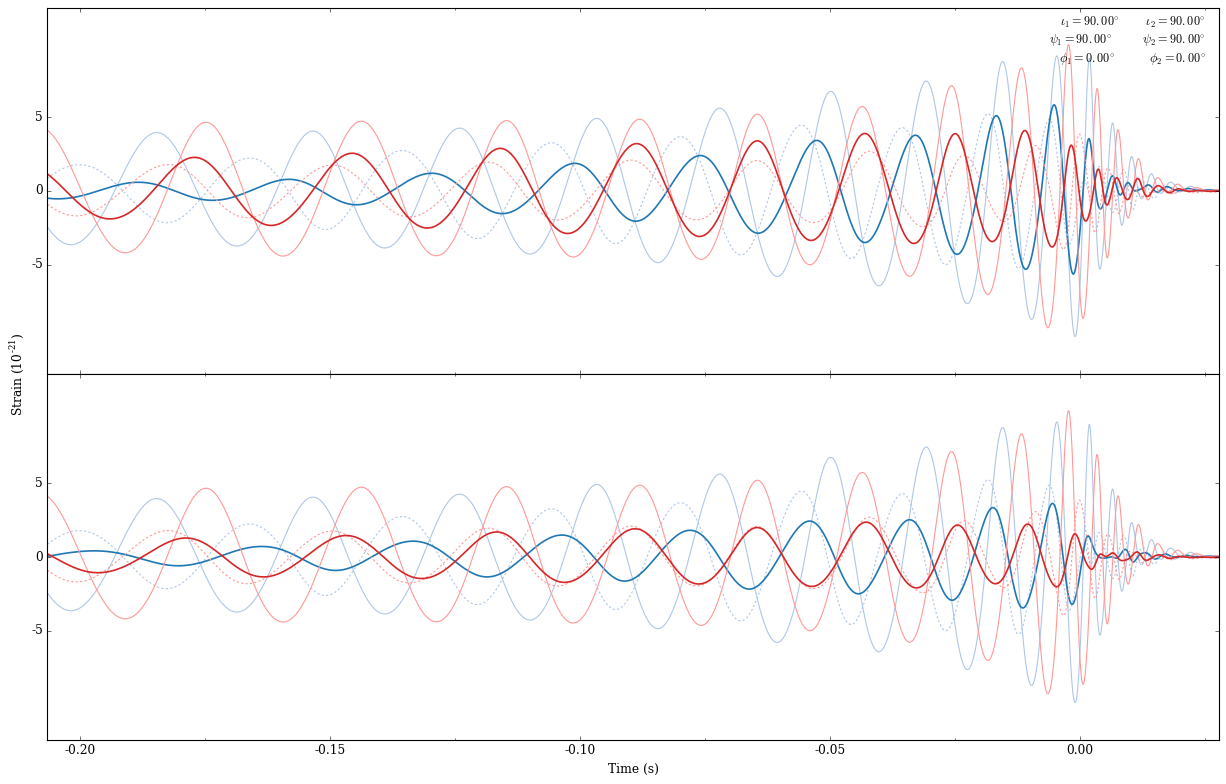

In [13]:
# Define configuration
params1.inclination  = np.pi*0.5
params1.polarization = np.pi*0.5
params1.coa_phase    = 0

params2.inclination  = params1.inclination
params2.polarization = params1.polarization
params2.coa_phase    = params1.coa_phase


def printipc(par):
    for k in [ s for s in par.__dict__.keys() if s in ['inclination','polarization','coa_phase'] ]:
        print '%s\t=\t%9.4f (degrees)' % (k,par.__dict__[k]*180/np.pi)
        
print '%s\n## The NON-HACKED Parameters are:\n%s'%(60*'-',60*'-')
printipc(params1)
print '%s\n## The HACKED Parameters are:\n%s'%(60*'-',60*'-')
printipc(params2)

# Plot TD detector response
outPath = "./mov/H1L1-h5-comparison-1.png"
wave.plot_td_waveform_resp(params1,params2,outPath=outPath,ant=False,resi=False,norm=False)

## Now correct  for L_hat and n_hat definitions: Find an inclination, polarization and coa_phase that doe this.

------------------------------------------------------------
## The NON-HACKED Parameters are:
------------------------------------------------------------
coa_phase	=	   0.0000 (degrees)
polarization	=	  90.0000 (degrees)
inclination	=	  90.0000 (degrees)
------------------------------------------------------------
## The HACKED Parameters are:
------------------------------------------------------------
coa_phase	=	 234.0174 (degrees)
polarization	=	  85.6449 (degrees)
inclination	=	 100.6686 (degrees)


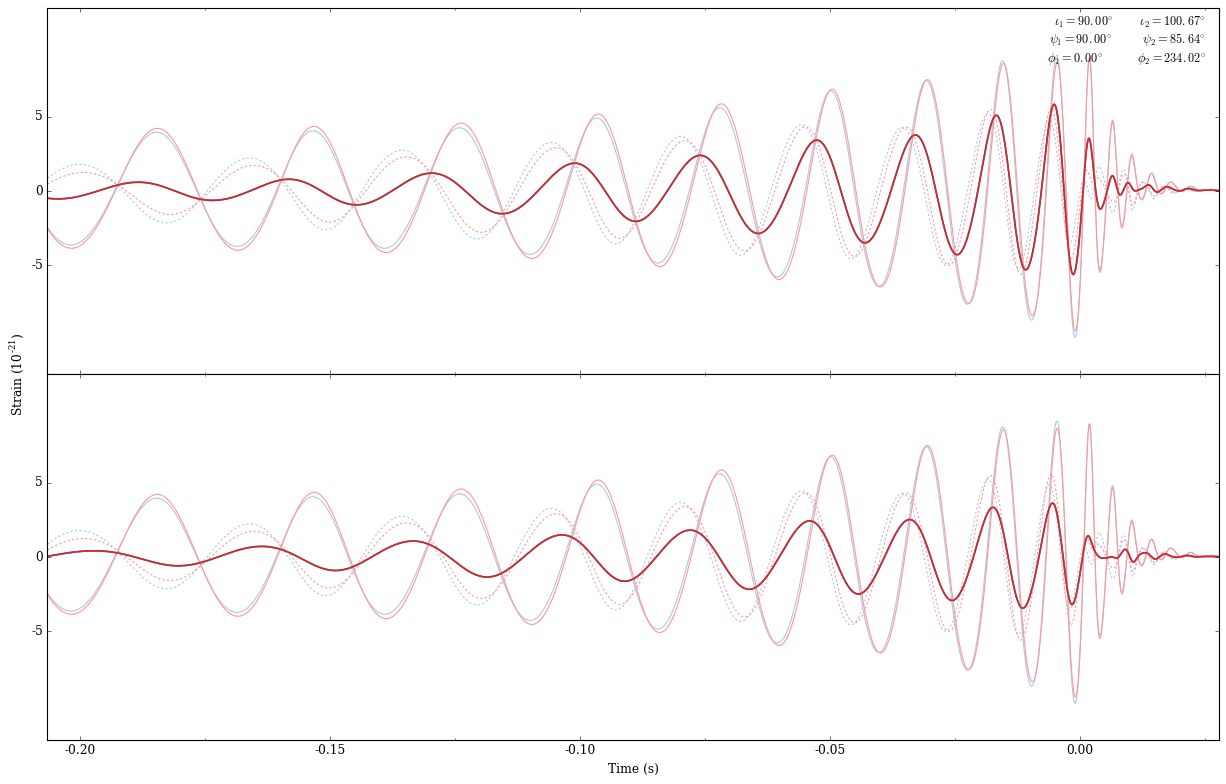

In [18]:
# Define configuration
params1.inclination  = np.pi*0.5
params1.polarization = np.pi*0.5
params1.coa_phase    = 0

h = h5.File(unhacked_location,'r')
hh =h5.File(hacked_location,'r')
inc,orbPhase,pol = wave.SimInspiralNRWaveformGetCorrectedRotationAnglesFromH5File(
    hh,h,params1.inclination,params1.coa_phase,params1.polarization)

params2.inclination  = inc
params2.polarization = pol
params2.coa_phase    = orbPhase
        
print '%s\n## The NON-HACKED Parameters are:\n%s'%(60*'-',60*'-')
printipc(params1)
print '%s\n## The HACKED Parameters are:\n%s'%(60*'-',60*'-')
printipc(params2)
        
# print 'inc1 = %f' % params1.inclination
# print 'inc2 = %f' % params2.inclination
# print 'pol1 = %f' % params1.polarization
# print 'pol2 = %f' % params2.polarization

outPath = "./mov/H1L1-h5-comparison.png"

# Plot TD detector response
wave.plot_td_waveform_resp(params1,params2,outPath=outPath,ant=False,resi=False,norm=False)

### How do the angles mentioned change when VARYING INLINATION?

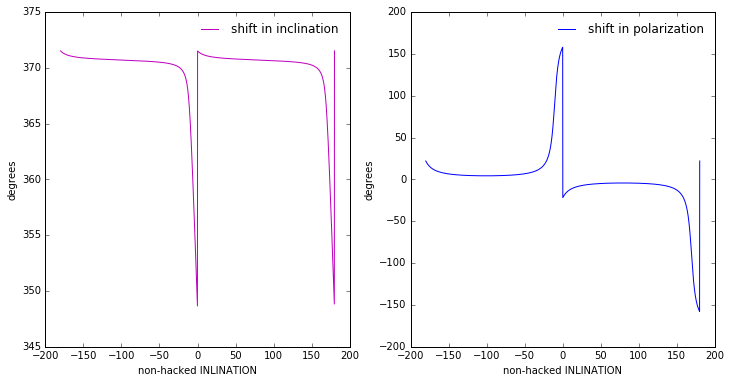

In [19]:
#
ang_range = np.linspace(-np.pi,np.pi,2e3)

#
h = h5.File(unhacked_location,'r')
hh =h5.File(hacked_location,'r')

# VARYING INCLINATION
inc = np.zeros( ang_range.shape )
orb = np.zeros( ang_range.shape )
pol = np.zeros( ang_range.shape )
for k,ang in enumerate(ang_range):

    params1.inclination  = ang # np.pi*0.5
    params1.coa_phase    = 0
    # The value below is chosen to coincide with worst-case scenarios
    params1.polarization = np.pi/2

    inc[k],orb[k],pol[k] = wave.SimInspiralNRWaveformGetCorrectedRotationAnglesFromH5File(
        hh,h,params1.inclination,params1.coa_phase,params1.polarization)
    
#
from matplotlib.pyplot import *

pol = np.unwrap(pol)
inc = np.unwrap(inc)

#
fig = figure( figsize=6*np.array((2,1)) )

subplot(1,2,1)
plot( 180*ang_range/np.pi, 180*(inc-ang_range)/np.pi, 'm', label='shift in inclination' )
xlabel('non-hacked INLINATION')
ylabel('degrees')
legend(frameon=False)

subplot(1,2,2)
plot( 180*ang_range/np.pi, 180*(pol-params1.polarization)/np.pi, 'b', label='shift in polarization' )
xlabel('non-hacked INLINATION')
ylabel('degrees')
legend(frameon=False)




### How do the angles mentioned change when VARYING POLARIZATION?

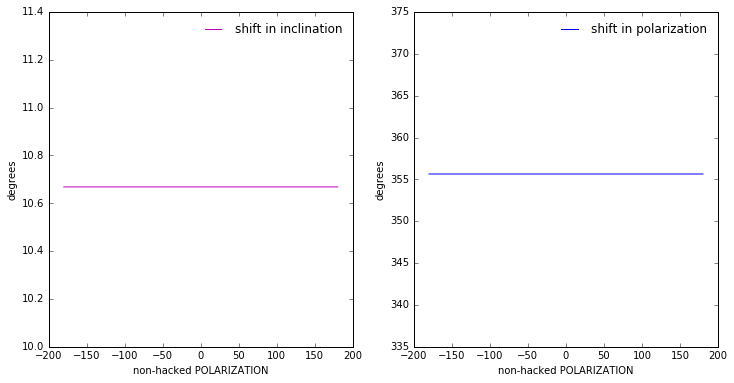

In [20]:

#
h = h5.File(unhacked_location,'r')
hh =h5.File(hacked_location,'r')

# VARYING INCLINATION
inc = np.zeros( ang_range.shape )
orb = np.zeros( ang_range.shape )
pol = np.zeros( ang_range.shape )
for k,ang in enumerate(ang_range):

    params1.polarization = ang
    params1.coa_phase    = 0
    # The value below is chosen to coincide with worst-case scenarios
    params1.inclination  = np.pi*0.5

    inc[k],orb[k],pol[k] = wave.SimInspiralNRWaveformGetCorrectedRotationAnglesFromH5File(
        hh,h,params1.inclination,params1.coa_phase,params1.polarization)
    
#
from matplotlib.pyplot import *

pol = np.unwrap(pol)
inc = np.unwrap(inc)

#
fig = figure( figsize=6*np.array((2,1)) )

subplot(1,2,1)
plot( 180*ang_range/np.pi, 180*(inc-params1.inclination)/np.pi, 'm', label='shift in inclination' )
xlabel('non-hacked POLARIZATION')
ylabel('degrees')
legend(frameon=False)

subplot(1,2,2)
plot( 180*ang_range/np.pi, 180*(pol-ang_range)/np.pi, 'b', label='shift in polarization' )
xlabel('non-hacked POLARIZATION')
ylabel('degrees')
legend(frameon=False)


